<a href="https://colab.research.google.com/github/nandini2110/StockMarketPrdecition_using_LSTM/blob/main/Stock_Market_prediction_using_lsmt_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.960691,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.746616,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.280138,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.184374,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.227924,458707200


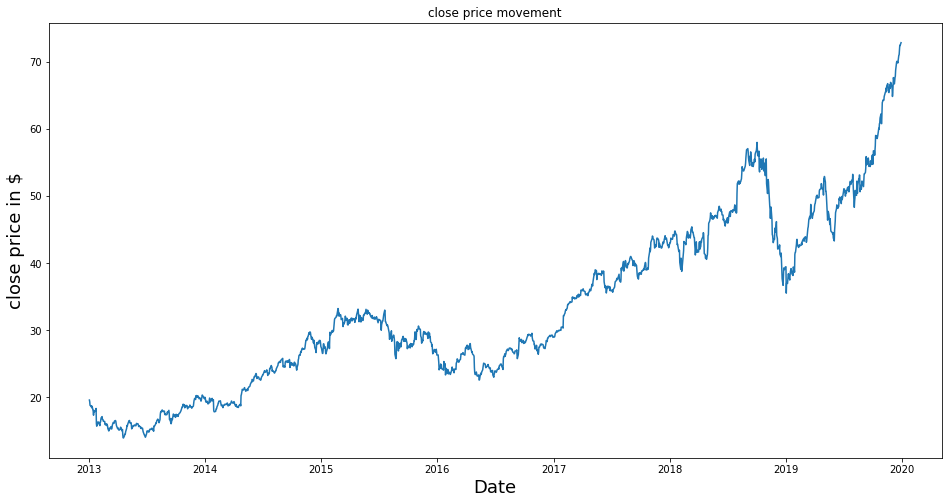

In [ ]:
plt.figure(figsize=(16,8))
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.title('close price movement')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset=data.values
len(dataset)

1761

In [ ]:
training_data_size=math.ceil(len(dataset)*.7)
training_data_size

1233

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.09605419],
       [0.09185448],
       [0.08270357],
       ...,
       [0.99317022],
       [0.99270352],
       [1.        ]])

In [ ]:
train_data=scaled_data[0:training_data_size,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)

[array([0.09605419, 0.09185448, 0.08270357, 0.08082491, 0.08167938,
       0.07670398, 0.08058859, 0.07864327, 0.06740157, 0.05780828,
       0.07003168, 0.06796515, 0.06634104, 0.06923175, 0.07483138,
       0.03634306, 0.0299071 , 0.035937  , 0.0410518 , 0.04017914,
       0.03936707, 0.03823381, 0.03138579, 0.04079123, 0.04049428,
       0.04708171, 0.05117842, 0.05417819, 0.04688778, 0.04634842,
       0.04609391, 0.04219719, 0.04209414, 0.0353431 , 0.0336523 ,
       0.0365309 , 0.03167668, 0.03541582, 0.03274933, 0.03082825,
       0.02420446, 0.01788972, 0.02461048, 0.02128949, 0.02427111,
       0.02496197, 0.02868899, 0.02296816, 0.02291968, 0.02543468,
       0.03219786, 0.03950647, 0.03876108, 0.03730054, 0.03769445,
       0.04325773, 0.04426979, 0.04279109, 0.03730054, 0.03159184])]
[0.02325905179276555]


In [ ]:
x_train,y_train=np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1173, 60, 1)

In [ ]:
model =Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1173/1173 [==============================] - 33s 26ms/step - loss: 7.9101e-04


In [ ]:
test_data=scaled_data[training_data_size - 60:, :]
x_test=[]
y_test= dataset[training_data_size:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions= model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.9957549337084223

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

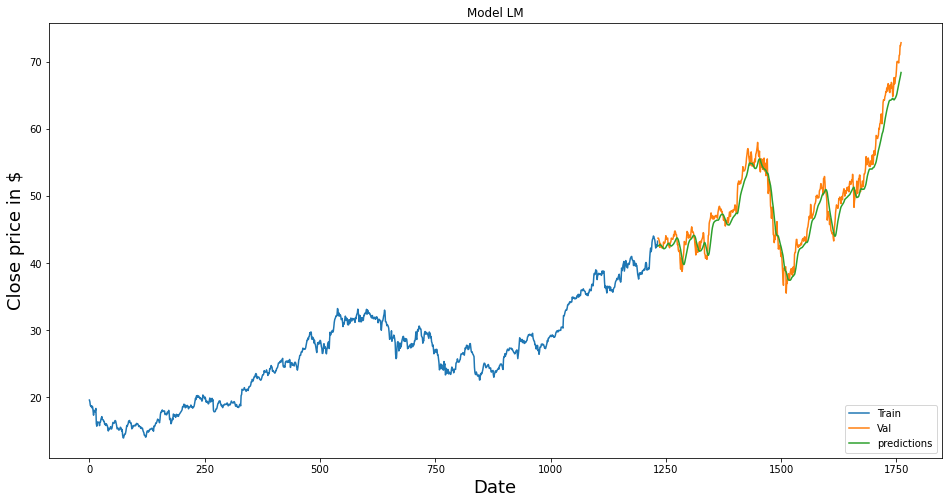

In [ ]:
train=data[:training_data_size]
valid=data[training_data_size:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model LM')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price in $', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show

In [ ]:
valid

,Close,predictions
1233,43.740002,42.574512
1234,43.742500,42.601952
1235,43.522499,42.668816
1236,43.267502,42.738049
1237,42.369999,42.784786
...,...,...
1756,71.000000,67.047745
1757,71.067497,67.360306
1758,72.477501,67.663841
1759,72.449997,68.045563
